<a href="https://colab.research.google.com/github/JorgeJaramilo060892/Data-Analyst/blob/main/Week_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet (Links to an external site.)

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection


Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

Analysis

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

Which company has maximum cab users at a particular time period?
Does margin proportionally increase with increase in number of customers?
What are the attributes of these customer segments?
Although not required, we encourage you to document the process and findings

What is the business problem?
What are the properties of the data provided (data intake report)
What steps did you take in order to create an applicable data set?
How did you prepare and perform your analysis?
What type of analysis did you perform?
Why did you choose to use certain analytical techniques over others?
What were the results?
Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

Deliverables of Week 2 are:

1. EDA Notebook (ipynb file)

2. Data Intake report (pdf file)

3. EDA recommendation and hypothesis results ( It should be in the ipynb notebook and you don't need not to present separate document)

You can use either EDA or Modeling and EDA both to deliver the result.

Remember, there are no wrong answers as long as the data supports them.

Note: Sample presentation of previous batch intern, for your reference is added

##Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns


In [2]:
data_cab = pd.read_csv("Cab_Data.csv")
data_city  = pd.read_csv("City.csv")
data_customer = pd.read_csv("Customer_ID.csv")
data_transaction = pd.read_csv("Transaction_ID.csv")

##Data Preparation

Let's see more details about the datasets

In [3]:
data_cab.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [4]:
data_cab.tail()

Transaction ID  Date of Travel     Company           City  \
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192

In [5]:
data_city.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [6]:
data_customer.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [7]:
data_transaction.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [8]:
 data_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [9]:
data_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
 data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [12]:
data_cab.describe()

Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000

In [13]:
merged_data = pd.merge(data_cab, data_transaction, on="Transaction ID")
merged_data = pd.merge(merged_data, data_customer, on="Customer ID")
merged_data = pd.merge(merged_data, data_city, on="City")



In [14]:
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'], errors='coerce')
merged_data['Month'] = merged_data['Date of Travel'].dt.month
merged_data['Year'] = merged_data['Date of Travel'].dt.year


In [15]:

merged_data.head()

Transaction ID                Date of Travel     Company        City  \
0        10000011 1970-01-01 00:00:00.000042377    Pink Cab  ATLANTA GA   
1        10351127 1970-01-01 00:00:00.000043302  Yellow Cab  ATLANTA GA   
2        10412921 1970-01-01 00:00:00.000043427  Yellow Cab  ATLANTA GA   
3        10000012 1970-01-01 00:00:00.000042375    Pink Cab  ATLANTA GA   
4        10320494 1970-01-01 00:00:00.000043211  Yellow Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
0         30.45         370.95      313.6350        29290         Card   Male   
1         26.19         598.70      317.4228        29290         Cash   Male   
2         42.55         792.05      597.4020        29290         Card   Male   
3         28.62         358.52      334.8540        27703         Card   Male   
4         36.38         721.10      467.1192        27703         Card   Male   

   Age  Income (USD/Month) Population     Users  Month  Year  
0   28               10813   814,885    24,701       1  1970  
1   28               10813   814,885    24,701       1  1970  
2   28               10813   814,885    24,701       1  1970  
3   27                9237   814,885    24,701       1  1970  
4   27                9237   814,885    24,701       1  1970

## Exploratory Data Analysis (EDA)

In [16]:
# We check the shape of the dataset
print('No of records:', merged_data.shape[0], '\n No of characteristics :',merged_data.shape[1])

No of records: 359392 
 No of characteristics : 16


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

- (1) datetime64[ns]
- (3) float64
- (6) int64
- (6) object

## Data Visualization

In [18]:
# Define a function to convert the string to number
def convert_to_numeric(value):
    if isinstance(value, str):
        try:
            return float(value.replace(',', ''))
        except ValueError:
            return value
    else:
        return value

# Clean the column 'Users'
merged_data['Users'] = merged_data['Users'].apply(convert_to_numeric)

# Calculated the mean of Users for Company
mean_users_by_company = merged_data.groupby('Company')['Users'].mean().reset_index()

# Merged the information of mean with the original DataFrame
merged_data_with_mean_users = pd.merge(merged_data, mean_users_by_company, on='Company', suffixes=('', '_mean'))

# Create the sunburst chart with the new information
fig = px.sunburst(
    merged_data_with_mean_users,
    color='Users_mean',  # Use the new column of mean Users
    values='Users_mean',
    path=['Company'],
    title='Distribution of Users Travel Between Companies',
    height=500
)
fig.update_traces(textinfo='label+percent entry')
fig.show()


As we can see users prefer to travel in the the "Yellow Cab"  than the "Pink Cab" company.

Comparison of Incomes generated by each company:

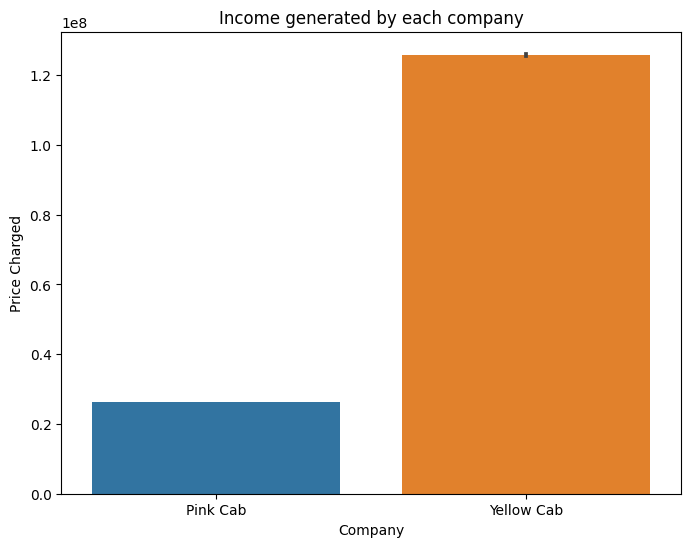

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Price Charged', data=merged_data, estimator=sum)
plt.title('Income generated by each company')
plt.show()

Distribution of trips in different cities:

In [20]:
fig = px.bar(merged_data, x='City', color='Company', title='Distribution of trips in different cities',
             labels={'City': 'City', 'Company': 'Company'},
             category_orders={"City": sorted(merged_data['City'].unique())},  # Ordena las ciudades
             height=600)

fig.update_layout(
    xaxis=dict(tickangle=45, tickmode='array', tickvals=list(range(len(merged_data['City'].unique())))),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


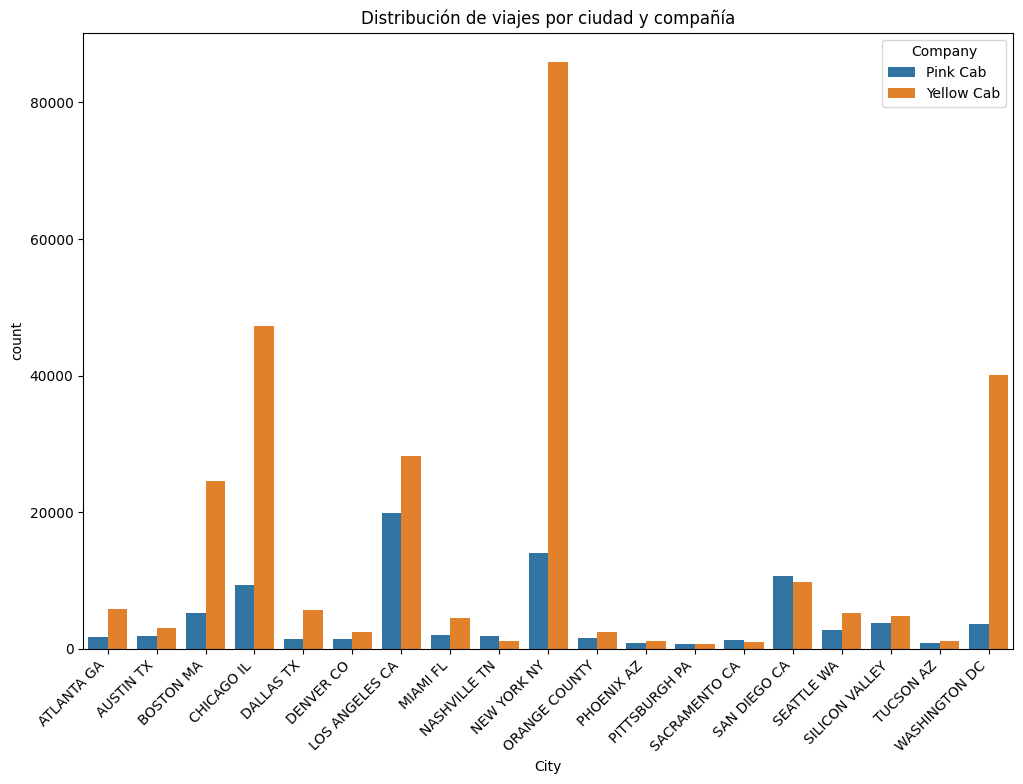

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='City', data=merged_data, hue='Company')
plt.title('Distribución de viajes por ciudad y compañía')
plt.xticks(rotation=45, ha='right')
plt.show()


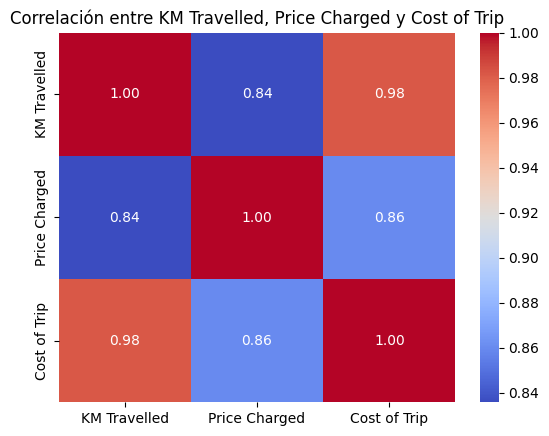

In [22]:
correlation_matrix = merged_data[['KM Travelled', 'Price Charged', 'Cost of Trip']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre KM Travelled, Price Charged y Cost of Trip')
plt.show()


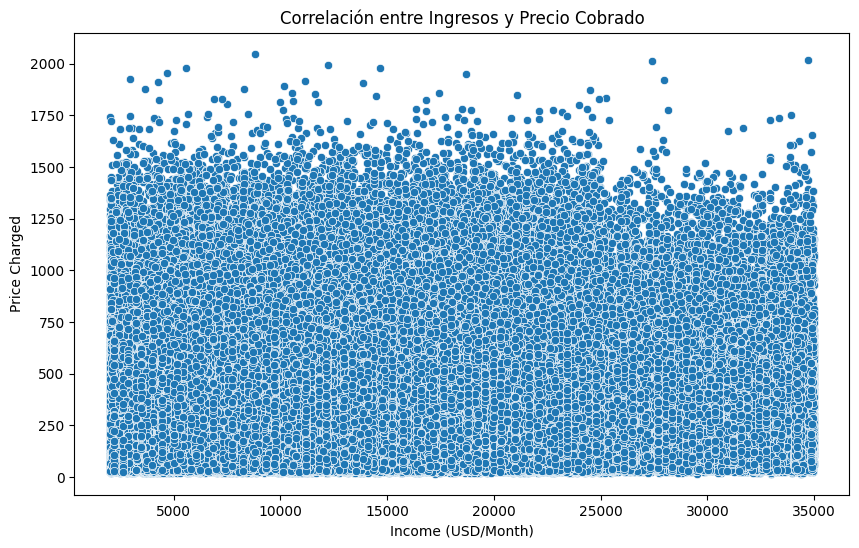

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income (USD/Month)', y='Price Charged', data=merged_data)
plt.title('Correlación entre Ingresos y Precio Cobrado')
plt.show()


## Data Cleaning[texto del enlace](https://)

In [24]:
# Let's see if we have null values
print(f'Nan Values:', merged_data.isna().sum())

Nan Values: Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Month                 0
Year                  0
dtype: int64


In [25]:
# Let's see if we have null values again
print(f'Nan Values:', merged_data.isna().sum())

Nan Values: Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Month                 0
Year                  0
dtype: int64


In [26]:
merged_data.describe()


Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age  Income (USD/Month)          Users  \
count  359392.000000  359392.000000       359392.000000  359392.000000   
mean    19191.652115      35.336705        15048.822937  158365.582267   
std     21012.412463      12.594234         7969.409482  100850.051020   
min         1.000000      18.000000         2000.000000    3643.000000   
25%      2705.000000      25.000000         8424.000000   80021.000000   
50%      7459.000000      33.000000        14685.000000  144132.000000   
75%     36078.000000      42.000000        21035.000000  302149.000000   
max     60000.000000      65.000000        35000.000000  302149.000000   

          Month      Year  
count  359392.0  359392.0  
mean        1.0    1970.0  
std         0.0       0.0  
min         1.0    1970.0  
25%         1.0    1970.0  
50%         1.0    1970.0  
75%         1.0    1970.0  
max         1.0    1970.0

 Let's find the correlation between the following columns
[["KM Travelled" vs "Price Charged" vs "Cost of Trip"]]

In [27]:
merged_data[['KM Travelled','Price Charged','Cost of Trip']].corr()

KM Travelled  Price Charged  Cost of Trip
KM Travelled       1.000000       0.835753      0.981848
Price Charged      0.835753       1.000000      0.859812
Cost of Trip       0.981848       0.859812      1.000000

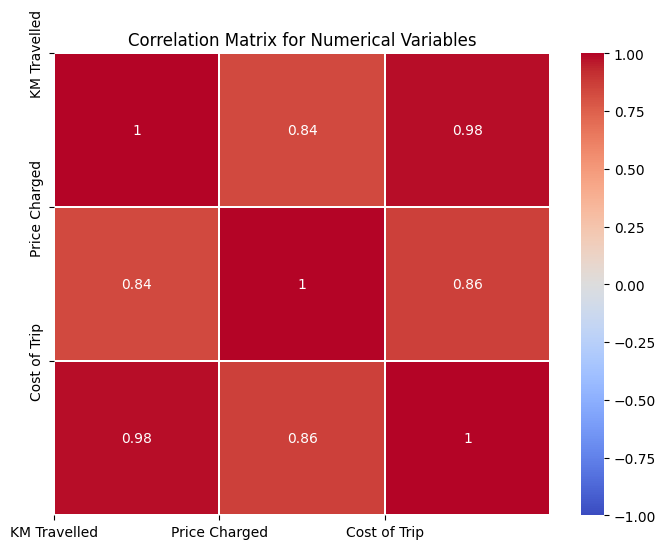

In [28]:
# We use the correlation between numerical variables (Correlation Matrix)
# where -1 (there is a strong relationship) 0 1 (there is a strong relationship)


# Let's create a new DataFrame with the numeric columns
numeric_data = merged_data[['KM Travelled', 'Price Charged', 'Cost of Trip']]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Visualization of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.3)
plt.title('Correlation Matrix for Numerical Variables')
plt.xticks(range(3), numeric_data.columns)
plt.yticks(range(3), numeric_data.columns, rotation=90)
plt.show()




Sometimes we would like to know the significant of the correlation estimate.

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is < 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is < 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is < 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is > 0.1: there is no evidence that the correlation is significant.</li>
</ul>

